In [24]:
import pandas as pd
import numpy as np

In [25]:
#import file from C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn
data = pd.read_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/train.csv", index_col=0)

In [26]:
# data['Age_Tenure_Ratio'] = data['Age']/data['Tenure']
# data['Balance_Salary_Ratio'] = data['Balance']/data['EstimatedSalary']
# data['Age_Balance_Ratio'] = data['Age']/data['Balance']
# data['Balance_Tenure_Ratio'] = data['Balance']/data['Tenure']
# data['CreditScore_Tenure_Ratio'] = data['CreditScore']/data['Tenure']
# data['OtherProducts'] = data['NumOfProducts'] - data['HasCrCard']
# data['Age_Balance_Salary_Ratio'] = data['Age']/data['Balance']/data['EstimatedSalary']
# data['Age_CreditScore_Ratio'] = data['Age']/data['CreditScore']
# data['Balance_CreditScore_Ratio'] = data['Balance']/data['CreditScore']
# data['Balance_Tenure_Salary_Ratio'] = data['Balance']/data['Tenure']/data['EstimatedSalary']
# data['CreditScore_Tenure_Salary_Ratio'] = data['CreditScore']/data['Tenure']/data['EstimatedSalary']
# data = data.replace([np.inf, -np.inf], 0)
# data = data.fillna(0)

Shape
Number of columns are 165034 and number of rows are 13

Data types


CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

Sample rows - Top 5


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0




EDA Statistics


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.65e+05,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.0,165034.00,165034.00
mean,1.57e+07,656.45,38.13,5.02,55478.09,1.55,0.75,0.5,112574.82,0.21
std,7.14e+04,80.10,8.87,2.81,62817.66,0.55,0.43,0.5,50292.87,0.41
min,1.56e+07,350.00,18.00,0.00,0.00,1.00,0.00,0.0,11.58,0.00
25%,1.56e+07,597.00,32.00,3.00,0.00,1.00,1.00,0.0,74637.57,0.00
50%,1.57e+07,659.00,37.00,5.00,0.00,2.00,1.00,0.0,117948.00,0.00
75%,1.58e+07,710.00,42.00,7.00,119939.52,2.00,1.00,1.0,155152.47,0.00
max,1.58e+07,850.00,92.00,10.00,250898.09,4.00,1.00,1.0,199992.48,1.00




Missing values


Series([], dtype: int64)



Count of Outliers


Age            313
Exited       34921
HasCrCard    40606
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


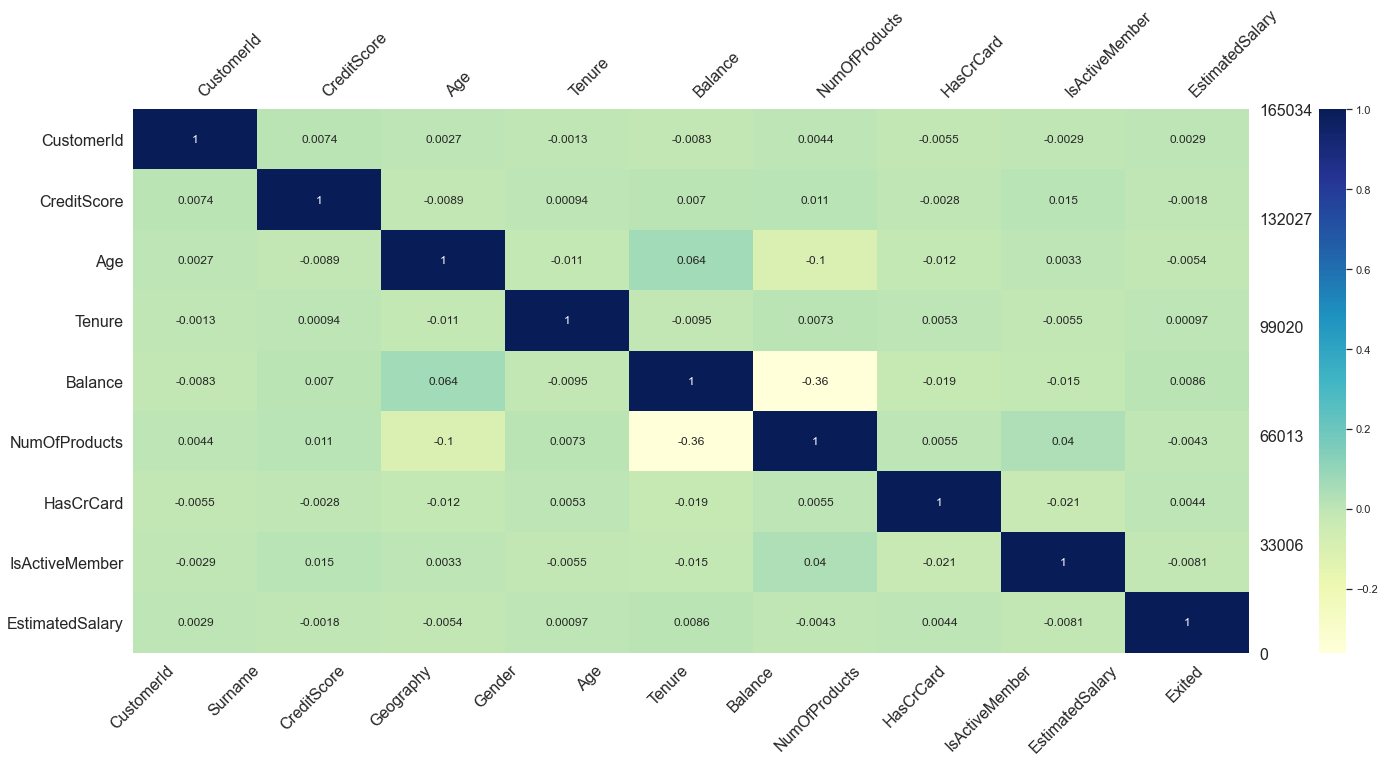

In [27]:
%run Source_Be_With_Me.ipynb
eda(data)

In [28]:
data.drop(['Surname','CustomerId'], axis=1, inplace=True)
data['HasCrCard'] = data['HasCrCard'].astype(int)
data['Age'] = data['Age'].astype(int)
data['IsActiveMember'] = data['IsActiveMember'].astype(int)

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Geography','Gender']))

In [30]:
# Transforming
transformed = transformer.fit_transform(data.drop(['Exited'], axis=1))
print(transformed.dtype)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = data.index
# Joining tables
data = pd.concat([data, transformed_df], axis=1)
# Dropping old categorical columns
data.drop(['Geography','Gender'], axis=1, inplace=True)
# CHecking result
data.head()

float64


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,,
0,668,33,3,0.00,2,1,0,181449.97,0,1.0,0.0,0.0,0.0,1.0
1,627,33,1,0.00,2,1,1,49503.50,0,1.0,0.0,0.0,0.0,1.0
2,678,40,10,0.00,2,1,0,184866.69,0,1.0,0.0,0.0,0.0,1.0
3,581,34,2,148882.54,1,1,1,84560.88,0,1.0,0.0,0.0,0.0,1.0
4,716,33,5,0.00,2,1,1,15068.83,0,0.0,0.0,1.0,0.0,1.0


In [31]:
trainX, trainY, testX, testY = stratified_sampling(data, 'Exited', 0.4, 903949505)

Original distribution


,counts,%
0,130113,78.84
1,34921,21.16




Train distribution


,counts,%
0,78067,78.84
1,20953,21.16




Test distribution


,counts,%
0,52046,78.84
1,13968,21.16




Train_x shape
Number of columns are 99020 and number of rows are 13


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
144865,651,34,2,0.00,2,1,1,100995.68,0.0,0.0,1.0,1.0,0.0
5644,745,38,5,0.00,1,1,0,96670.20,1.0,0.0,0.0,0.0,1.0
105829,574,35,1,99774.50,1,0,0,4896.11,0.0,1.0,0.0,1.0,0.0
116624,760,33,3,121593.18,2,1,0,123086.59,0.0,1.0,0.0,1.0,0.0
160685,652,36,1,0.00,2,1,1,44215.86,0.0,0.0,1.0,1.0,0.0




Train_y shape
Number of columns are 99020 and number of rows are 1


,Exited
id,
144865,0
5644,0
105829,0
116624,0
160685,0




Train_x shape
Number of columns are 66014 and number of rows are 13


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
62827,702,37,8,0.00,2,0,0,94949.84,1.0,0.0,0.0,0.0,1.0
137573,716,50,10,0.00,1,0,0,163427.18,0.0,0.0,1.0,1.0,0.0
151346,850,34,6,0.00,2,1,1,114448.13,1.0,0.0,0.0,1.0,0.0
75365,809,37,8,152303.66,2,1,1,175082.20,1.0,0.0,0.0,0.0,1.0
23180,641,34,5,0.00,2,1,1,92915.84,0.0,0.0,1.0,1.0,0.0




Train_y shape
Number of columns are 66014 and number of rows are 1


,Exited
id,
62827,0
137573,1
151346,0
75365,0
23180,0


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainX)
trainX = pd.DataFrame(scaler.transform(trainX), columns=trainX.columns, index=trainX.index)
testX = pd.DataFrame(scaler.transform(testX), columns=testX.columns, index=testX.index)
display(trainX.head())
display(testX.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
144865,0.60,0.22,0.2,0.00,0.33,1.0,1.0,0.50,0.0,0.0,1.0,1.0,0.0
5644,0.79,0.27,0.5,0.00,0.00,1.0,0.0,0.48,1.0,0.0,0.0,0.0,1.0
105829,0.45,0.23,0.1,0.40,0.00,0.0,0.0,0.02,0.0,1.0,0.0,1.0,0.0
116624,0.82,0.20,0.3,0.48,0.33,1.0,0.0,0.62,0.0,1.0,0.0,1.0,0.0
160685,0.60,0.24,0.1,0.00,0.33,1.0,1.0,0.22,0.0,0.0,1.0,1.0,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male
id,,,,,,,,,,,,,
62827,0.70,0.26,0.8,0.00,0.33,0.0,0.0,0.47,1.0,0.0,0.0,0.0,1.0
137573,0.73,0.43,1.0,0.00,0.00,0.0,0.0,0.82,0.0,0.0,1.0,1.0,0.0
151346,1.00,0.22,0.6,0.00,0.33,1.0,1.0,0.57,1.0,0.0,0.0,1.0,0.0
75365,0.92,0.26,0.8,0.61,0.33,1.0,1.0,0.88,1.0,0.0,0.0,0.0,1.0
23180,0.58,0.22,0.5,0.00,0.33,1.0,1.0,0.46,0.0,0.0,1.0,1.0,0.0


In [33]:
# Dtree = decision_tree(X=trainX, Y=trainY, max_depth=9)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(Dtree, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(Dtree, testX, testY)

In [34]:
# XGB = xgboost(X=trainX, Y=trainY, learning_rate=0.05, n_estimators=1000, subsample=0.3, max_depth=5)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(XGB, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(XGB, testX, testY)

In [35]:
# KNN = knn(X=trainX, Y=trainY, distance='euclidean', n_neighbors=1000)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(KNN, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(KNN, testX, testY)

In [36]:
# NN = nnet(X=trainX, Y=trainY, learning_rate=0.001, loss='binary_crossentropy', epochs=100, batch_size=32, validation_split=0.2, patience=15)

In [37]:
# GBM = gradient_boosting(X=trainX, Y=trainY, learning_rate=0.01, n_estimators=10000, subsample=0.5, max_depth=6)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(GBM, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(GBM, testX, testY)

In [38]:
# #Testing on OOT dataset
# #read data C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\Test.csv
# submission = pd.read_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Test.csv", index_col=0)
# # submission['Age_Tenure_Ratio'] = submission['Age']/submission['Tenure']
# # submission['Balance_Salary_Ratio'] = submission['Balance']/submission['EstimatedSalary']
# # submission['Age_Balance_Ratio'] = submission['Age']/submission['Balance']
# # submission['Balance_Tenure_Ratio'] = submission['Balance']/submission['Tenure']
# # submission['CreditScore_Tenure_Ratio'] = submission['CreditScore']/submission['Tenure']
# # submission['OtherProducts'] = submission['NumOfProducts'] - submission['HasCrCard']
# # submission['Age_Balance_Salary_Ratio'] = submission['Age']/submission['Balance']/submission['EstimatedSalary']
# # submission['Age_CreditScore_Ratio'] = submission['Age']/submission['CreditScore']
# # submission['Balance_CreditScore_Ratio'] = submission['Balance']/submission['CreditScore']
# # submission['Balance_Tenure_Salary_Ratio'] = submission['Balance']/submission['Tenure']/submission['EstimatedSalary']
# # submission['CreditScore_Tenure_Salary_Ratio'] = submission['CreditScore']/submission['Tenure']/submission['EstimatedSalary']
# submission = submission.replace([np.inf, -np.inf], 0)
# submission = submission.fillna(0)
# submission.drop(['Surname','CustomerId'], axis=1, inplace=True)
# submission['HasCrCard'] = submission['HasCrCard'].astype(int)
# submission['Age'] = submission['Age'].astype(int)
# submission['IsActiveMember'] = submission['IsActiveMember'].astype(int)
# # Transforming
# transformed = transformer.transform(submission)
# # Transformating back
# transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
# # One-hot encoding removed an index. Let's put it back:
# transformed_df.index = submission.index
# # Joining tables
# submission = pd.concat([submission, transformed_df], axis=1)
# # Dropping old categorical columns
# submission.drop(['Geography','Gender'], axis=1, inplace=True)
# # CHecking result
# eda(submission)
# submission = pd.DataFrame(scaler.transform(submission), columns=submission.columns, index=submission.index)

# # #Use Dtree
# # predictions_submission = Dtree.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_Dtree.csv", index=True)

# # #Use XGB
# # predictions_submission = XGB.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_XGB.csv", index=True)

# # #Use Knn
# # predictions_submission = KNN.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_KNN.csv", index=True)

# #Use NN
# predictions_submission = NN.predict(submission)
# threshold = 0.8
# predictions_submission = (predictions_submission > threshold).astype(int)
# predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# #change column names to submi
# predictions_submission.columns = ['Exited']
# display(predictions_submission.head())
# #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_NN8.csv", index=True)

# # #Use GBM
# # predictions_submission = GBM.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_GBM.csv", index=True)

<Figure size 1080x720 with 0 Axes>

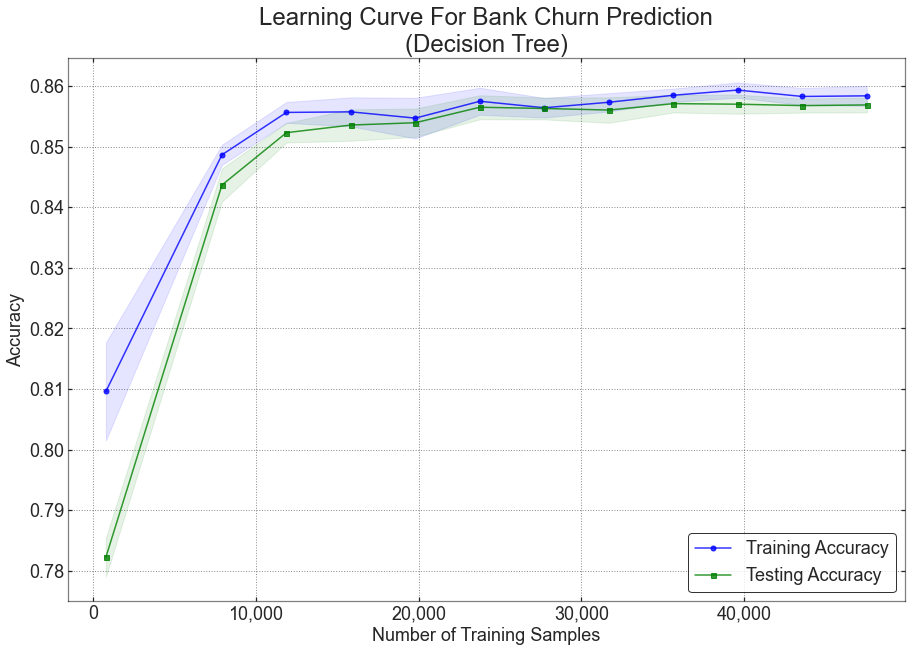

<Figure size 576x432 with 0 Axes>

In [41]:
#learning curve DTree
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 100, min_samples_split = 100, random_state = 903949505)
learning_curve_self(h1 = "C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/DTree_LearningCurve.jpg",
                              X_train=trainX, y_train=trainY, classifier=classifier, title = "Learning Curve For Bank Churn Prediction\n(Decision Tree)", train_sizes=np.array([0.01,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]), cv=5)

<Figure size 1080x720 with 0 Axes>

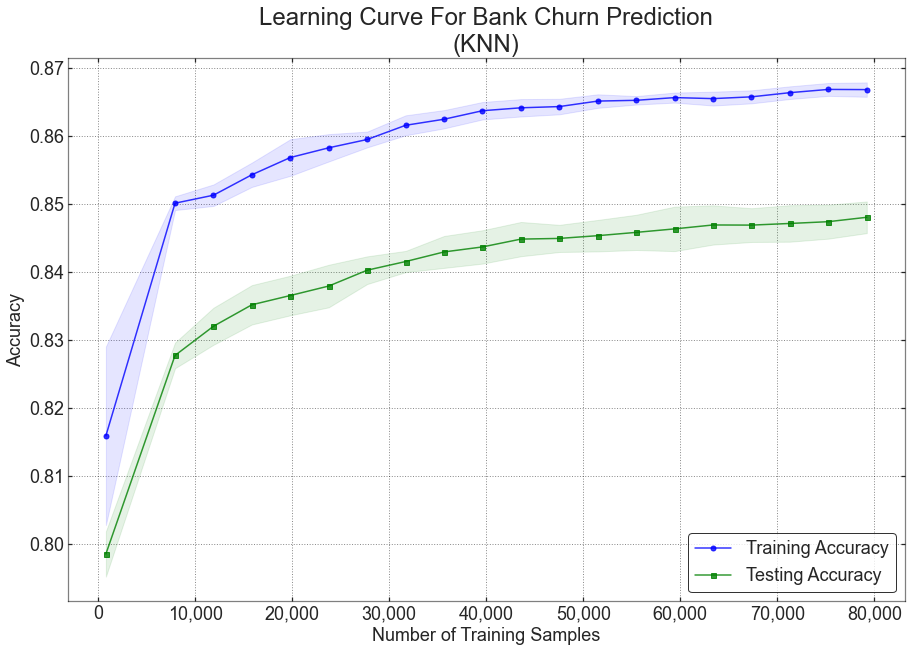

<Figure size 576x432 with 0 Axes>

In [44]:
#learning curve KNN
classifier = KNeighborsClassifier(n_neighbors=10, p=2)
learning_curve_self(h1 = "C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_LearningCurve.jpg",
                              X_train=trainX, y_train=trainY, classifier=classifier, title = "Learning Curve For Bank Churn Prediction\n(KNN)", train_sizes=np.array([0.01,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]), cv=5)

In [ ]:
#learning curve KNN
classifier = KNeighborsClassifier(n_neighbors=10, p=2)
learning_curve_self(h1 = "C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_LearningCurve.jpg",
                              X_train=trainX, y_train=trainY, classifier=classifier, title = "Learning Curve For Bank Churn Prediction\n(KNN)", train_sizes=np.array([0.01,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]), cv=5)

In [ ]:
#learning curve KNN
classifier = classifier = KNeighborsClassifier(n_neighbors=1, p=2)
learning_curve_self(h1 = "C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_LearningCurve_k1.jpg",
                              X_train=trainX, y_train=trainY, classifier=classifier, title = "Learning Curve For Bank Churn Prediction\nK = 1 (KNN)", train_sizes=np.array([0.01,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]), cv=5)

In [ ]:
#learning curve KNN
classifier = KNeighborsClassifier(n_neighbors=100, p=2)
learning_curve_self(h1 = "C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_LearningCurve_k100.jpg",
                              X_train=trainX, y_train=trainY, classifier=classifier, title = "Learning Curve For Bank Churn Prediction\nK = 100 (KNN)", train_sizes=np.array([0.01,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]), cv=5)

<Figure size 1080x720 with 0 Axes>

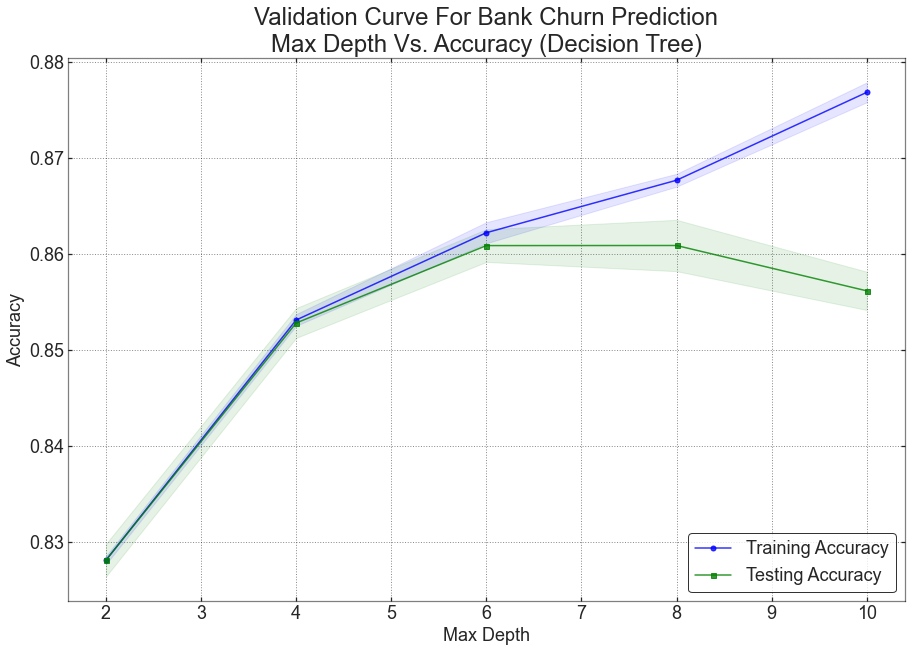

<Figure size 576x432 with 0 Axes>

C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.85278732 0.84036558 0.83503333]
  category=UserWarning
C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the train scores are non-finite: [       nan 0.85310038 0.84036558 0.83508382]
  category=UserWarning


<Figure size 1080x720 with 0 Axes>

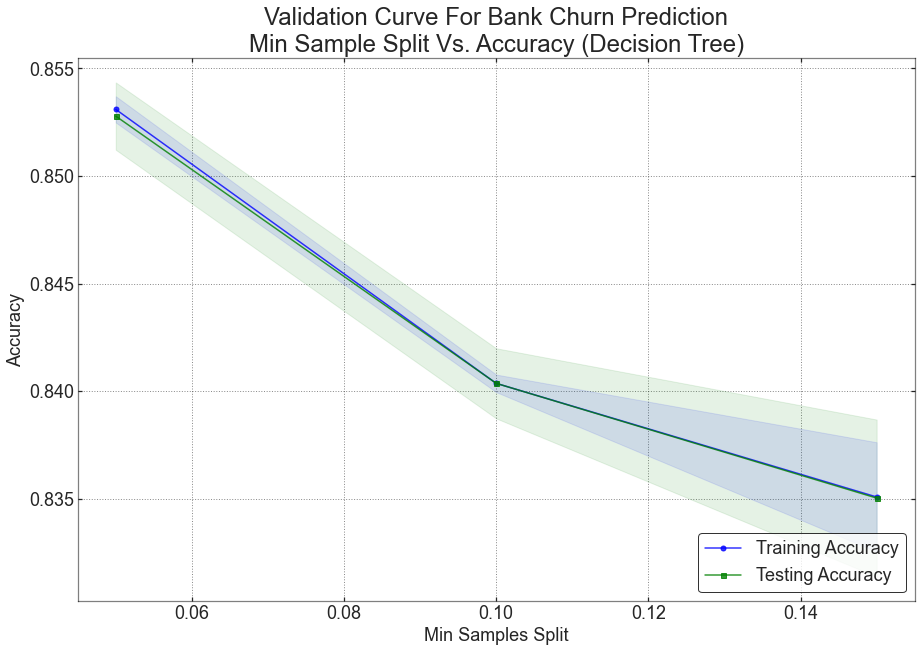

<Figure size 576x432 with 0 Axes>

In [192]:
# Define the hyperparameter grid for max_depth
classifier = DecisionTreeClassifier(random_state=903949505)
param_grid = {
    'max_depth': np.array([2,4,6,8,10])
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_max_depth', col2='Max Depth', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/DTree_ValidationCurve_MaxDepth.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/DTree_ValidationCurve_MaxDepth.jpg",title = "Validation Curve For Bank Churn Prediction\nMax Depth Vs. Accuracy (Decision Tree)",form='{:,.0f}')

param_grid = {
    'min_samples_split': np.array([0,0.05,0.1,0.15])
}
DT_Grid_Min_Sample_Split = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_min_samples_split', col2='Min Samples Split', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/DTree_ValidationCurve_MinSampleSplit.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/DTree_ValidationCurve_MinSampleSplit.jpg",title = "Validation Curve For Bank Churn Prediction\nMin Sample Split Vs. Accuracy (Decision Tree)",form='{:.2f}')

C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Figure size 1080x720 with 0 Axes>

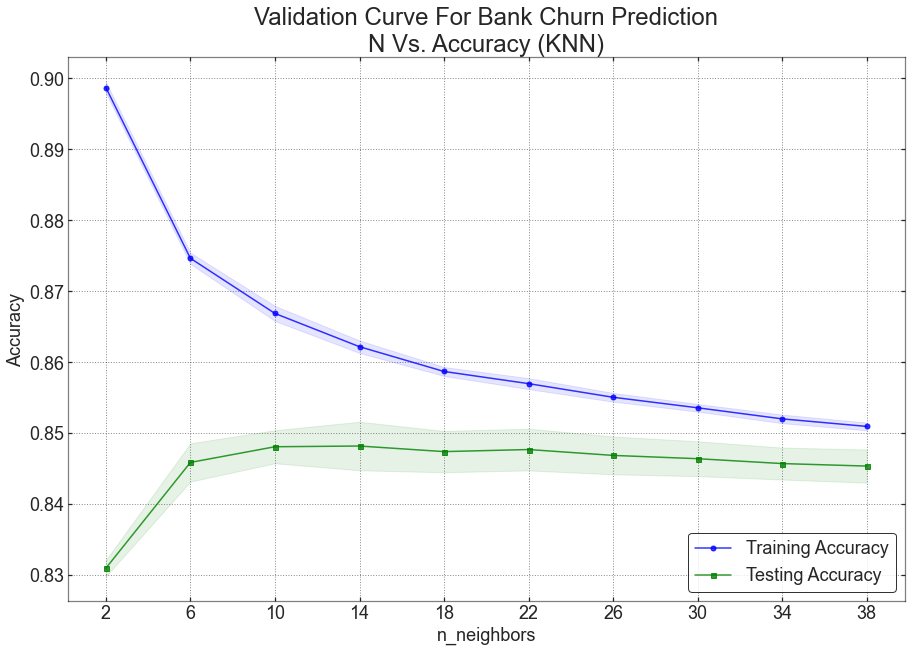

<Figure size 576x432 with 0 Axes>

In [209]:
# Define the hyperparameter grid for max_depth
param_grid = {
    'n_neighbors': [2, 6, 10, 14, 18, 22, 26, 30, 34, 38]
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_n_neighbors', col2='n_neighbors', classifier=classifier,
                                excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_ValidationCurve_N.xlsx",
                                printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_ValidationCurve_N.jpg",title = "Validation Curve For Bank Churn Prediction\nN Vs. Accuracy (KNN)",form='{:,.0f}',
                                Change_name= False, custom_x_values=[2, 6, 10, 14, 18, 22, 26, 30, 34, 38])

C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Figure size 1080x720 with 0 Axes>

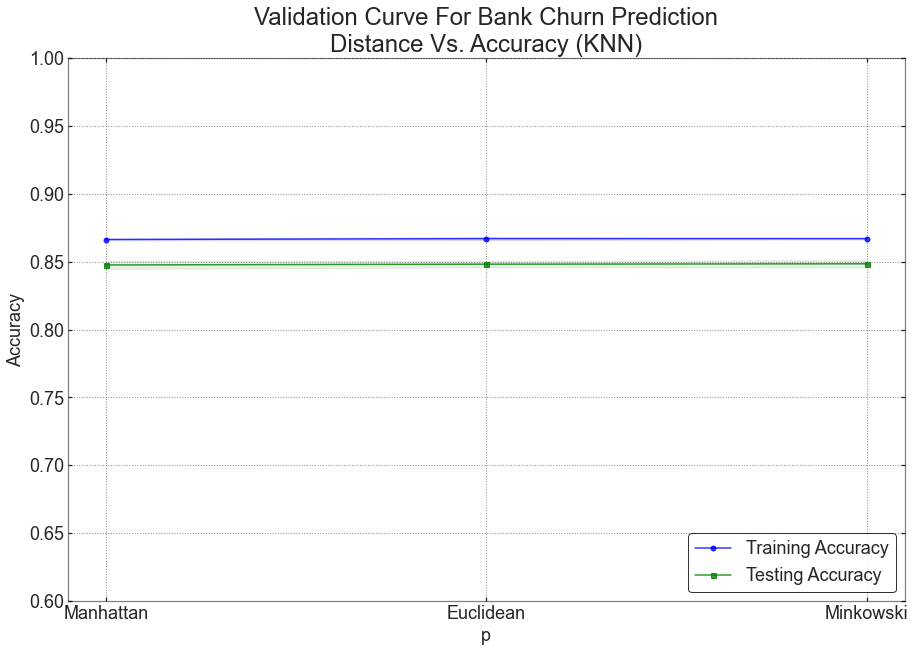

<Figure size 576x432 with 0 Axes>

In [16]:
classifier = KNeighborsClassifier(n_neighbors=10)
param_grid = {
    'p': [1, 2, 3]
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_p', col2='p', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_ValidationCurve_distance.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/KNN_ValidationCurve_distance.jpg",title = "Validation Curve For Bank Churn Prediction\nDistance Vs. Accuracy (KNN)",form='{:,.0f}',
                                Change_name= True, custom_x_values=[1, 2, 3], new_labels = ['Manhattan','Euclidean','Minkowski'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<Figure size 1080x720 with 0 Axes>

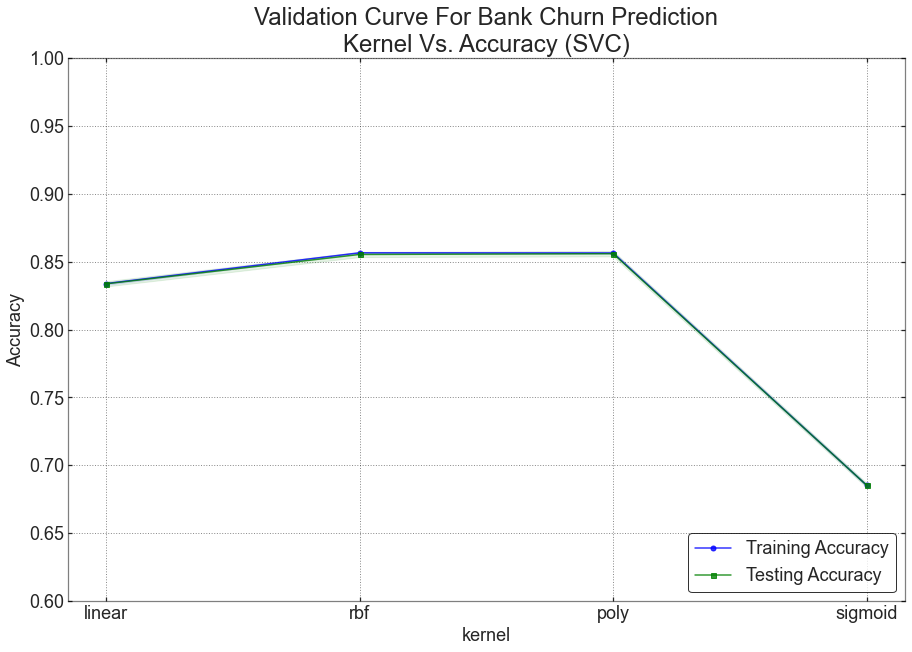

<Figure size 576x432 with 0 Axes>

In [21]:
classifier = SVC(C = 10)
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Different kernel types
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_kernel', col2='kernel', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/SVC_ValidationCurve_kernel.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/SVC_ValidationCurve_kernel.jpg",title = "Validation Curve For Bank Churn Prediction\nKernel Vs. Accuracy (SVC)",form='{:,.0f}',
                                Change_name= True, custom_x_values=['linear', 'rbf', 'poly', 'sigmoid'], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1)

In [ ]:
classifier = SVC(kernel='poly', C = 10)
param_grid = {
    #'C': [0.1, 1, 10, 100]  # Different values for the regularization parameter C
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_gamma', col2='gamma', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/SVC_ValidationCurve_gamma.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/SVC_ValidationCurve_gamma.jpg",title = "Validation Curve For Bank Churn Prediction\nGamma Vs. Accuracy (SVC)",form='{:,.3f}',
                                Change_name= False, custom_x_values=['linear', 'rbf', 'poly', 'sigmoid'], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
classifier = xgb.XGBClassifier(n_estimators=10000, nthread=-1, early_stopping_rounds = 50)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 1.0],
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_learning_rate', col2='learning_rate', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_learning_rate.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_learning_rate.jpg",title = "Validation Curve For Bank Churn Prediction\nLearning Rate Vs. Accuracy (XGBoost)",form='{:,.2f}',
                                Change_name= False, custom_x_values=['linear', 'rbf', 'poly', 'sigmoid'], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1)

In [ ]:
classifier = xgb.XGBClassifier(n_estimators=1000, nthread=-1, early_stopping_rounds = 10)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 1.0],
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_learning_rate', col2='learning_rate', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_learning_rate.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Images/XGB_ValidationCurve_learning_rate.jpg",title = "Validation Curve For Bank Churn Prediction\nLearning Rate Vs. Accuracy (XGBoost)",form='{:,.2f}',
                                Change_name= False, custom_x_values=['linear', 'rbf', 'poly', 'sigmoid'], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1)